# Quantitative Investing with Python

# NOTEBOOK 4

Alan Moreira, University of Rochester Simon Graduate School of Business

 ## Objectives

 1. The Capital allocation line
 2. Mean-variance frontier
     - case study on international diversification
     - implementation of portfolio constraints in the MV optimizer
     - role of estimation uncertainty
 3. Risk-parity and minimum variance investing 
 4. Strategy evaluation
     




##  1.  The Capital Allocation Line

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#GlobalFinMonthly
url="https://www.dropbox.com/s/3k35mt3t57ygff2/GlobalFinMonthly.csv?dl=1"

Data = pd.read_csv(url,index_col=0,parse_dates=True,na_values=-99)

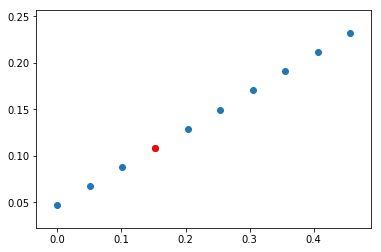

In [46]:
w=np.linspace(0,3,10)
plt.scatter(w*Data['MKT'].std()*12**0.5,((1-w)*Data['RF'].mean()+w*Data['MKT'].mean())*12)
plt.scatter(1*Data['MKT'].std()*12**0.5,Data['MKT'].mean()*12,color='red')
plt.show()

 What is the Slope of the capital allocation line?



In [47]:
Slope=(Data['MKT'].mean()-Data['RF'].mean())/Data['MKT'].std()*12**0.5
Slope

0.4046678623199824


What is the Mean-Variance investor weight on the market as a function of his/her risk-aversion?


$$w=\frac{E[R]-R_f}{\alpha VAR(R)}$$



2.654754319264594


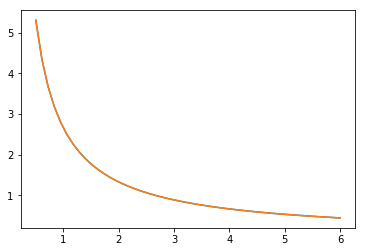

In [48]:
alpha=np.linspace(0.5,6,50)
riskreturntradeoff=(Data['MKT'].mean()-Data['RF'].mean())/(Data['MKT'].var())
print(riskreturntradeoff)
plt.plot(alpha,riskreturntradeoff/alpha)
plt.plot(alpha,riskreturntradeoff/alpha)
plt.show()

Mean-variance Mathematics and the Efficient Investment Frontier: case study on international portfolio diversification

In [49]:
Data.head()

,RF,MKT,USA30yearGovBond,EmergingMarkets,WorldxUSA,WorldxUSAGovBond
Date,,,,,,
1963-02-28,0.0023,-0.0215,-0.001878,0.098222,-0.002773,0.003206
1963-03-31,0.0023,0.0331,0.003342,0.014149,0.000371,0.001913
1963-04-30,0.0025,0.0476,-0.001843,-0.147055,-0.003336,0.008002
1963-05-31,0.0024,0.0200,-0.001807,-0.012172,-0.000186,0.004689
1963-06-30,0.0023,-0.0177,0.001666,-0.055699,-0.011160,0.003139


In [50]:
# for convenience lets rename these assets

Data=Data.rename(columns={Data.columns[1]: "MKTUS",Data.columns[2]: "BondUS",
                          Data.columns[3]: "EM",Data.columns[4]: "MKTxUS",Data.columns[5]: "BondxUS" })
Data.tail()

,RF,MKTUS,BondUS,EM,MKTxUS,BondxUS
Date,,,,,,
2016-08-31,0.0002,0.0052,-0.008417,0.025186,0.000838,-0.009552
2016-09-30,0.0002,0.0027,-0.016417,0.013153,0.012736,0.009979
2016-10-31,0.0002,-0.0200,-0.049460,0.002474,-0.020383,-0.043476
2016-11-30,0.0001,0.0487,-0.081636,-0.045971,-0.019798,-0.050359
2016-12-31,0.0003,0.0185,-0.005296,0.002904,0.034383,-0.023207


In [51]:
# lets start by constructing a matrix with only excess returns
Re=(Data.drop('RF',axis=1)).subtract(Data['RF'],axis='index')
Re.tail()

,MKTUS,BondUS,EM,MKTxUS,BondxUS
Date,,,,,
2016-08-31,0.0050,-0.008617,0.024986,0.000638,-0.009752
2016-09-30,0.0025,-0.016617,0.012953,0.012536,0.009779
2016-10-31,-0.0202,-0.049660,0.002274,-0.020583,-0.043676
2016-11-30,0.0486,-0.081736,-0.046071,-0.019898,-0.050459
2016-12-31,0.0182,-0.005596,0.002604,0.034083,-0.023507


In [52]:
# now we estimate the expected return and the covariance using the sample moments
ERe=Re.mean()
ERe

MKTUS      0.005140
BondUS     0.002523
EM         0.006923
MKTxUS     0.004149
BondxUS    0.002052
dtype: float64

In [53]:
Cove=Re.cov()
Cove

,MKTUS,BondUS,EM,MKTxUS,BondxUS
MKTUS,0.001948,0.000111,0.001292,0.001264,0.000187
BondUS,0.000111,0.001227,-0.000204,-0.000013,0.000264
EM,0.001292,-0.000204,0.003556,0.001661,0.000248
MKTxUS,0.001264,-0.000013,0.001661,0.002182,0.000422
BondxUS,0.000187,0.000264,0.000248,0.000422,0.000406


1. First we will solve for the maxium Sharpe ratio feasible

$$(E[R]'VAR(R)^{-1}E[R])^{1/2}$$

2. Then we will solve for the wights that implement this Sharpe ratio

$$VAR(R)^{-1}E[R]$$

3. And then we will solve for the constant $\lambda$ that implements a desired level of expected excess returns

In [54]:
SR_int=(ERe.values.T @ np.linalg.inv(Cove) @ ERe.values)**0.5
SR_int

0.16369789630430479

In [55]:
# annualized

SR_int*12**0.5

0.5670661469823949

In [56]:
# compares with market

Re.MKTUS.mean()/Re.MKTUS.std()*12**0.5

0.40345097267659175

In [57]:
# construct the optimal weights
Wmve=pd.DataFrame([],index=Re.columns)
Wmve['wghts0'] =np.linalg.inv(Cove) @ ERe.values

Wmve


,wghts0
MKTUS,1.834995
BondUS,1.423872
EM,1.605498
MKTxUS,-1.026051
BondxUS,3.368940


To find the weights that implement a particular expected return target we use Lecture 3 formulas

$$\lambda=\frac{\mu_{target}}{E[R^e]'Var(R^e)^{-1}E[R^e]}$$
$$W^*=\lambda Var(R^e)^{-1}E[R^e]$$



In [58]:
# target ER

mu_target=0.01
lamb=(mu_target/(ERe.values.T @ np.linalg.inv(Cove) @ ERe.values))
print(lamb)
# must 
Wmve['Wgths1']=lamb*(np.linalg.inv(Cove) @ ERe.values)
Wmve

0.37317608433285165


,wghts0,Wgths1
MKTUS,1.834995,0.684776
BondUS,1.423872,0.531355
EM,1.605498,0.599134
MKTxUS,-1.026051,-0.382898
BondxUS,3.368940,1.257208


In [59]:
# lets compute the domestic (we only keep the first two columns MKT +Bonds)
ERdom=Re[['MKTUS','BondUS']].mean()
Covdom=Re[['MKTUS','BondUS']].cov()
SR_dom=(ERdom.values.T @ np.linalg.inv(Covdom) @ ERdom.values)**0.5
print(SR_dom*12**0.5)
Wmvedom= np.linalg.inv(Covdom) @ ERdom.values
Wmve.loc[['MKTUS','BondUS'],'wghtsdom']=Wmvedom
Wmve

0.46009875470841877


,wghts0,Wgths1,wghtsdom
MKTUS,1.834995,0.684776,2.534954
BondUS,1.423872,0.531355,1.827591
EM,1.605498,0.599134,NaN
MKTxUS,-1.026051,-0.382898,NaN
BondxUS,3.368940,1.257208,NaN


In [60]:
#To get a bit of intuition we can normalize the weights to add up to 1

# Why these weights do not have to add up to 1?

# why is of to normalize than to 1?

# what changes when we do that? What does not change?

# why columns 'wgths0' and 'wghts1' have the same weight after normalization?
Wmve/Wmve.sum()

,wghts0,Wgths1,wghtsdom
MKTUS,0.254604,0.254604,0.581072
BondUS,0.197561,0.197561,0.418928
EM,0.222761,0.222761,NaN
MKTxUS,-0.142364,-0.142364,NaN
BondxUS,0.467437,0.467437,NaN


In [61]:
# this difference is the benefits of international diversification

SR_int-SR_dom

0.030878826361946193

- what does that mean?

- it means for example that if you want to target a portfolio with a volatility of 5% per month (about the vol of the US market portfolio), then you get  


In [62]:
# international diversification
voltarget=0.05
[SR_int*voltarget,SR_dom*voltarget]


[0.008184894815215239, 0.00664095349711793]

In [63]:
# annualized  your returns increase by 
(SR_int*voltarget -SR_dom*voltarget)*12

0.018527295817167708

In [64]:
# in percentual increase it is very meaningful
(SR_int*voltarget -SR_dom*voltarget)/(SR_dom*voltarget)

0.2324878978248162

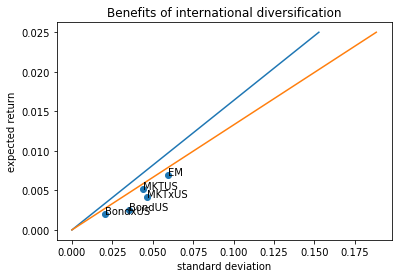

In [65]:
# Lets visualize this in a plot the two investment frontiers

# set different expected return targets
mu_target=np.linspace(0,0.025,20)
# international portfolios
STD_MVE_int=(Wmve['wghts0'] @ Cove @ Wmve['wghts0'].T)**0.5
lam=mu_target/(SR_int**2)
STD_target_int=lam*STD_MVE_int
plt.plot(STD_target_int,mu_target)
#Domestic portfolios
STD_MVE_dom=(Wmve.loc[['MKTUS','BondUS'],'wghtsdom'] @ Covdom @ Wmve.loc[['MKTUS','BondUS'],'wghtsdom'].T)**0.5
STD_target_dom=mu_target/(SR_dom**2)*STD_MVE_dom
plt.plot(STD_target_dom,mu_target)
plt.scatter(Re.std(),Re.mean())

# lets add some labels so we know which point is each portfolio
# First time that I use loop? If yes discuss

for label in Re.columns :
   plt.text(Re.std()[label],Re.mean()[label],label)

plt.xlabel('standard deviation')
plt.ylabel('expected return')
plt.title('Benefits of international diversification')
plt.show()


     
# Estimation uncertainty     

- We will start by evaluating the uncertainty regading our average expected excess return estimates for each asset
- We will then show how the weights change as we pertubate these estimates in a way that is consistent with the amount of uncertainty
- We will then show how sensitive the benefits of international diversification are

If observation are serially uncorrelated over time, which returns are close to being, than the standard deviation of an average estiamtor is simply

$$std\left(\sum_i^N\frac{x_i}{N}\right)=\frac{std(x_i)}{\sqrt{N}}$$

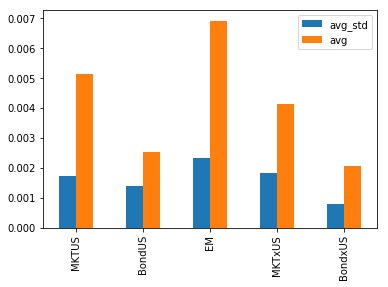

In [66]:
# Lets contrast the WMVE weights with the SR of each 
avg_std=(Re.std()/(Re.shape[0]**0.5))
avg=Re.mean()
ERstd=pd.concat([avg_std,avg],axis=1)
ERstd=ERstd.rename(columns={1:'avg',0:'avg_std'})
ERstd.plot.bar()

In [67]:
# even with 50 years, there is still considerable uncertainty, specially for bonds

Re.shape[0]/12

53.916666666666664

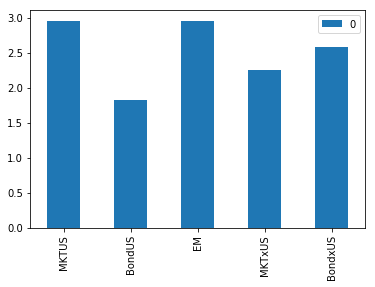

In [68]:
# we can look at the t-stats (against zero) for the assets
# the average return divided by the average return estiamtor standard deviation
ERstd=pd.concat([Re.mean()/(Re.std()/(Re.shape[0]**0.5))],axis=1)
ERstd.plot.bar()

T-stat for a given hypothesis $\mu_{j}^0$

$$t_j(\mu_0)=\frac{\bar{R_j}-\mu_{j}^0}{\sigma(\bar{R_j})}$$

For example lets assume we have strong theoretical reasons to believe that these assets must not have negative expected returns. (True for equities, less true for bonds)

So lets do a 1-sided test with 5% interval and ask what is the largest expected return Xj that we can say with 95% confidence that the asset j has expected return higher than Xj

$$1.64=\frac{\bar{R_j}-\mu_{j}^0}{\sigma(\bar{R_j})}$$
$$\mu_{j}^0=\bar{R_j}-1.64\sigma(\bar{R_j})$$

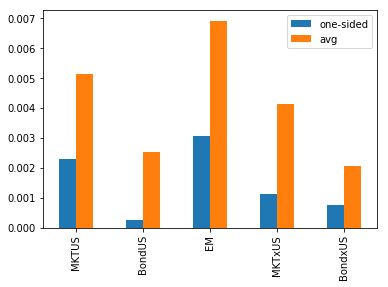

In [69]:
ER0=pd.concat([Re.mean()-1.64*(Re.std()/(Re.shape[0]**0.5)),Re.mean()],axis=1)
ER0=ER0.rename(columns={1:'avg',0:'one-sided'})
ER0.plot.bar()

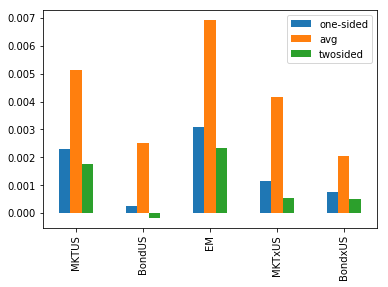

In [70]:
# if we are more agnostic and believe less in the economic theories we have, then we must do a two-sided interval

ER0['twosided']=Re.mean()-1.96*(Re.std()/(Re.shape[0]**0.5))

ER0.plot.bar()

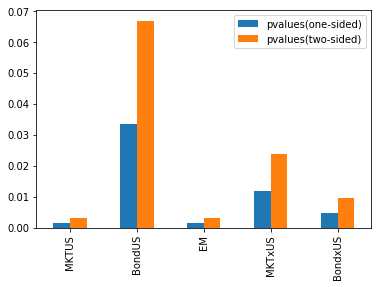

In [71]:
# We can also construct p'values
from scipy.stats import norm
# and I am creating this p object which is the standard normal distribution
pnorm=norm(0,1)


ER0['pvalues(one-sided)']=1-pnorm.cdf((Re.mean()/(Re.std()/(Re.shape[0]**0.5))).values)
ER0['pvalues(two-sided)']=(1-pnorm.cdf(np.abs((Re.mean()/(Re.std()/(Re.shape[0]**0.5))).values)))*2
ER0[['pvalues(one-sided)','pvalues(two-sided)']].plot.bar()

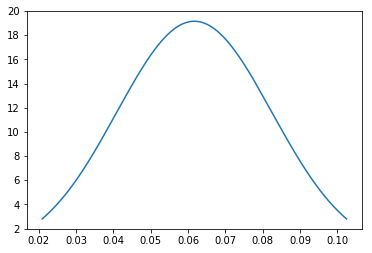

In [72]:
# lets look at 95% confidence interval (I am annulaizing for convenience)
interval=0.95
tails=(1-interval)/2

asset='MKTUS'
mu=Re[asset].mean()*12
musigma=Re[asset].std()*(12)/Re[asset].count()**0.5
p=norm(mu,musigma)
# this constructs a grid going spanning the region given by the confidence interval
grid=np.linspace(mu+pnorm.isf(tails)*musigma,mu+pnorm.isf(1-tails)*musigma,1000)
# note that x=pnorm.isf(q) is the inverse of the CDF.

#The inverse CDF at q is also referred to as the q quantile of a distribution.
#For a continuous distribution dist the inverse CDF at q is the value x such that CDF[DIST,x]=q. 
# So there is excatly probability q that the realization is higher than x.
plt.plot(grid, p.pdf(grid))
plt.show()

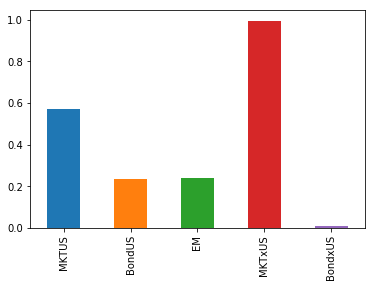

In [73]:
# a perhaps more relevant test is whether all these assets have the same average return
# For assets that have a average return below the average, I compute the probability that this expected return is indeed 
# below, and 
# for assets that have the avg return above avg I compute the probbility that the expected return is indeed 
#above the mean across assets
# ER0['same_avg_pvalue']=\
# (1-pnorm.cdf(((Re.mean()-Re.mean().mean())/(Re.std()/(Re.shape[0]**0.5))).values))*(Re.mean()>Re.mean().mean())\
# +(pnorm.cdf(((Re.mean()-Re.mean().mean())/(Re.std()/(Re.shape[0]**0.5))).values))*(Re.mean()<=Re.mean().mean())
#(probability of being above the average)*(average above avg across assets?)
#(probability of being below the average)*(average below avg across assets?)

# or much more easily:

ER0['same_avg_pvalue']=(1-pnorm.cdf(np.abs((Re.mean()-Re.mean().mean())/(Re.std()/(Re.shape[0]**0.5))).values))*2

# pvalue is the probability that the null hupothesis is right. So in this case it tells us that there is 
#a 60% probability that the mktus return equals to the average  and 100% probability that the MKTxUS expected return
# is equal to the average of all assets average returns

# here we can only clearly reject the hypothesis that non us bonds expected returns are equal to the average returns
ER0.same_avg_pvalue.plot.bar()

In [76]:
# lets look at what happens with weights and Sharpes as we pertubate the mean of the market return by one standard deviation
asset='MKTUS'
pertubation=1.96
Ere=Re.mean()*12
mu=Re[asset].mean()*12
musigma=Re[asset].std()*(12**0.5)
ERemsig=Ere.copy()
ERemsig[asset]=mu-pertubation*musigma
Wmve[asset+'-'+str(pertubation)+'std'] =np.linalg.inv(Cove) @ ERemsig.values

Wmve

,wghts0,Wgths1,wghtsdom,MKTUS-1std,MKTUS-1.96std
MKTUS,1.834995,0.684776,2.534954,-113.573489,-243.743181
BondUS,1.423872,0.531355,1.827591,42.002484,65.921867
EM,1.605498,0.599134,NaN,39.670494,59.258829
MKTxUS,-1.026051,-0.382898,NaN,58.540921,126.560312
BondxUS,3.368940,1.257208,NaN,0.643562,-37.548808


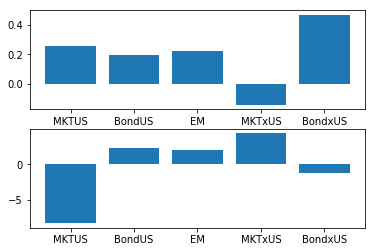

In [77]:
# lets compare with the MVE weights using the sample mean
plt.subplot(2,1,1)
plt.bar(x=ERe.index,height=Wmve['wghts0']/np.abs(Wmve['wghts0'].sum()))
plt.subplot(2,1,2)
plt.bar(x=ERe.index,height=Wmve['MKTUS-1.96std']/np.abs(Wmve['MKTUS-1.96std'].sum()))
plt.show()

# observation: In class I got all confused with this plot. Basically, I was dividing by the sum of the weights to normalize 
# the weights so we could clearly see in the plot (again, only relative weights matters becasue we are looking as excess returns)
# but obviously I cannot multiply/divide by a negative number otherwise I will be shorting instead of going long the tangency portfolio
# which would be a stupid thing to do! 
# So Wmve['MKTUS-1.96std']/(Wmve['MKTUS-1.96std'].sum())
# was doing two things, It was normalizing but also multiplying by a negative number since (Wmve['MKTUS-1.96std'].sum())<0
# So now by having the abosulte value function I am just normalizing.

# Portfolio constraints

Python has the flexibility to solve the mean-variance problem numerically

allow you to impose 

- Shorting contraitns
- Position limits
- Concentration limits
- Leverage limits

In [78]:
from scipy.optimize import minimize

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.004931508083852444
            Iterations: 7
            Function evaluations: 49
            Gradient evaluations: 7


[Text(0,0,'MKTUS'),
 Text(0,0,'BondUS'),
 Text(0,0,'EM'),
 Text(0,0,'MKTxUS'),
 Text(0,0,'BondxUS')]

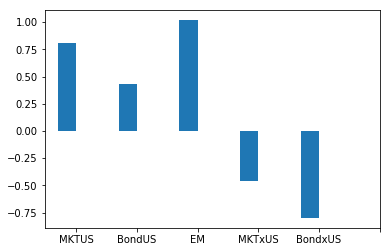

In [103]:
# we will now learn how to learn how to do a numerical minimization. For those of you that know it, this
# is similar to solver in excel

# first start by defining some useful variables
rf=0.015/12
# the risk-free rate is special because at a given time we know exactly what are the expected returns of investing
# in it, since it is risk-free!
# so it does not make sense to use the average risk-free rate in the portfolio problem, and we should rather the one 
# we currently can invest at no risk
# here we are dividing by 12 becasue we are entering annualized numbers

Ertarget=0.12/12
# this above is the target for monthly expected returns

levlimit=1
# here is maximum amount of borrowing at the risk-free rate. 1.5 means that for each dollars you put in you can borrow 
# up to 50 cents and have a total risk asset portfolio of 1.5 dollars

def func(W):
    return W.T @ Cove @ W

# this is the function that the program will minimize
# in this case it is the variance of a portfolio with weights W
# the weights will be our choice variable, what the minimization function will be changing


cons=({'type': 'eq',
          'fun' : lambda W : W.T @ ERe.values+rf-Ertarget},
        {'type': 'ineq',
          'fun' : lambda W: -W.sum()+levlimit}) # this means -W.sum()+ levlimit >=0 , which means levlimit>=W.sum()

# this specify the constraint that the minimization problem must satisfy
# you can specify two types of constraints
#    'eq'  which require function =0
#     for example:'eq', 'fun' : lambda W : W.T @ ERe.values+rf-Ertarget
#     defines the function F(W)=W.T @ ERe.values+rf-Ertarget
#     and requires W to satisfy F(W)=0
#    'ineq' which require function >=0
#     for example: 'ineq', 'fun' : lambda W: -W.sum()+levlimit
#     defines  F(W)=-W.sum()+levlimit
#     and requires F(W)>=0

W0=np.zeros(Re.shape[1])/Re.shape[1] 
# we need to provide a initial guess for the solution
# here we choose the equal weighted portfolio

res = minimize(func,W0, constraints=cons, options={'disp': True})
# this code does the minimization, it takes the function to be minimized,
# the inital guess, and the set of cntraints that the solution has to satisfy

# below I am plotting the solution weights.
width=0.3
ind=np.arange(Re.shape[1])
fig, ax = plt.subplots()
ax.bar(ind,res.x,width)

ax.set_xticks(np.array([0,1,2,3,4,5])+ width / 2)
ax.set_xticklabels(Re.columns)

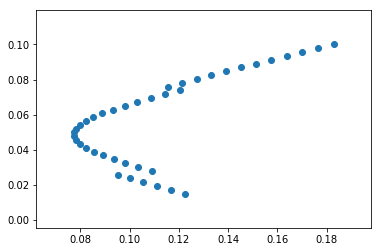

In [117]:
# lets trace out the entire Mean-varaince frontier when neither borrowing or lending at the risk-free rate is not allowed
levlimit=1  # this makes sure the weights add up to 1
minstd=[]
rf=0.015/12
mutargets=np.linspace(rf,0.1/12,40)
for a0 in mutargets:
    cons=({'type': 'eq',
          'fun' : lambda W : W.T @ ERe.values+rf-a0},
        {'type': 'eq',
          'fun' : lambda W: -W.sum()+levlimit})
    
    res1 = minimize(func,W0,  constraints=cons, options={'disp': False})
 #   print(res1.x)
    minstd.append([res1.fun**0.5,res1.x @ ERe.values+rf])

plt.scatter(np.array(minstd)[:,0]*12**0.5,np.array(minstd)[:,1]*12)

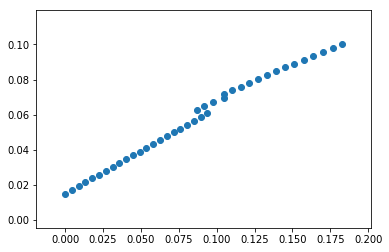

In [118]:
# lets trace out the entire Mean-varaince frontier when neither borrowing at the risk-free rate is not allowed
levlimit=1
minstd=[]
rf=0.015/12
mutargets=np.linspace(rf,0.1/12,40)
for a0 in mutargets:
    cons=({'type': 'eq',
          'fun' : lambda W : W.T @ ERe.values+rf-a0},
        {'type': 'ineq',# I changed to inequality
          'fun' : lambda W: -W.sum()+levlimit})
    
    res1 = minimize(func,W0,  constraints=cons, options={'disp': False})
 #   print(res1.x)
    minstd.append([res1.fun**0.5,res1.x @ ERe.values+rf])

plt.scatter(np.array(minstd)[:,0]*12**0.5,np.array(minstd)[:,1]*12)

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.0004294283032725429
            Iterations: 2
            Function evaluations: 14
            Gradient evaluations: 2
0.5935729074526048


[Text(0,0,'MKTUS'),
 Text(0,0,'BondUS'),
 Text(0,0,'EM'),
 Text(0,0,'MKTxUS'),
 Text(0,0,'BondxUS')]

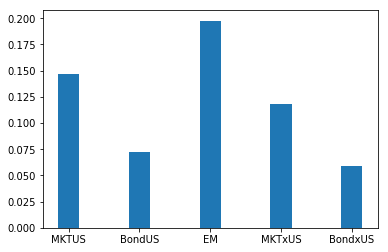

In [119]:
# Introducing a non-shorting constraint. Implicilty this also rule out leverage within the portfolio
Ertarget=0.05/12
rf=0.015/12
levlimit=1

def func(W):
    return W.T @ Cove @ W
cons=({'type': 'eq',
          'fun' : lambda W : W.T @ ERe.values+rf-Ertarget},
        {'type': 'ineq',
          'fun' : lambda W: -W.sum()+levlimit},
         {'type': 'ineq',
          'fun' : lambda W: W})
# I simply add a non-shorting constraint W>=0 which implies the weights cannot be negative
# note than it is the levlimit that controls how much you are allowed to short  the risk-free asset,
# which is the same as borrowing at the risk free rate

res = minimize(func,W0, constraints=cons, options={'disp': True})
print(res.x.sum())
width=0.3
ind=np.arange(Re.shape[1])
fig, ax = plt.subplots()
ax.bar(ind,res.x,width)

ax.set_xticks(ind)
ax.set_xticklabels(Re.columns)

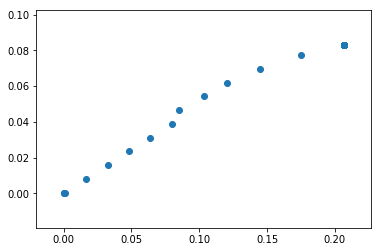

In [124]:
# lets trace out the entire Mean-varaince frontier when shorting is not allowed
levlimit=1
minstd=[]
mutargets=np.linspace(0,0.30,40)
for a0 in mutargets:
    cons=({'type': 'eq',
          'fun' : lambda W : W.T @ ERe.values+rf-a0/12},
        {'type': 'ineq',
          'fun' : lambda W: -W.sum()+levlimit},
         {'type': 'ineq',
          'fun' : lambda W: W})
    
    res1 = minimize(func,W0,  constraints=cons, options={'disp': False})
    minstd.append([res1.fun**0.5,res1.x @ ERe.values])

plt.scatter(np.array(minstd)[:,0]*12**0.5,np.array(minstd)[:,1]*12)

It is well known that some are are easier to short

For example, shorting the whole US equity market can be approxiamted fairly well by selling a future on the S&P 500



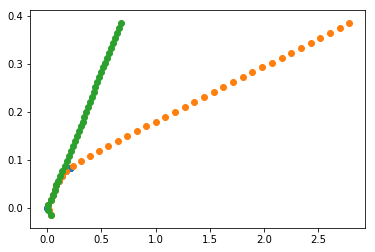

In [130]:
levlimit=1
minstd=[]
mutargets=np.linspace(0,0.40,40)
for a0 in mutargets:
    cons=({'type': 'eq',
          'fun' : lambda W : W.T @ ERe.values+rf-a0/12},
        {'type': 'ineq',
          'fun' : lambda W: -W.sum()+levlimit},
         {'type': 'ineq',
          'fun' : lambda W: W})
    
    res1 = minimize(func,W0,  constraints=cons, options={'disp': False})
    minstd.append([res1.fun**0.5,res1.x @ ERe.values])

minstd2=[]

for a0 in mutargets:
    cons=({'type': 'eq',
          'fun' : lambda W : W.T @ ERe.values+rf-a0/12},
        {'type': 'ineq',
          'fun' : lambda W: -W.sum()+levlimit},
         {'type': 'ineq',
          'fun' : lambda W: W[1:]})
    
    res1 = minimize(func,W0,  constraints=cons, options={'disp': False})
    minstd2.append([res1.fun**0.5,res1.x @ ERe.values])

# for comparison lets also plot the unconstrained
minstd3=[]
for a0 in mutargets:
    cons=({'type': 'eq',
          'fun' : lambda W : W.T @ ERe.values+rf-a0/12})
    
    res1 = minimize(func,W0,  constraints=cons, options={'disp': False})
    minstd3.append([res1.fun**0.5,res1.x @ ERe.values])

plt.scatter(np.array(minstd)[:,0]*12**0.5,np.array(minstd)[:,1]*12)
plt.scatter(np.array(minstd2)[:,0]*12**0.5,np.array(minstd2)[:,1]*12)
plt.scatter(np.array(minstd3)[:,0]*12**0.5,np.array(minstd3)[:,1]*12)

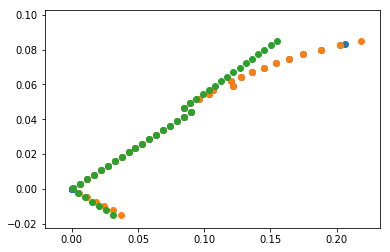

# Minimum-variance investing

Assumes all asset shave the same expected return

Min $W'Var(R)W$ subject to $1'W=1$

$W_{minvariance}=Var(R)^{-1}1$


Why this might make sense?

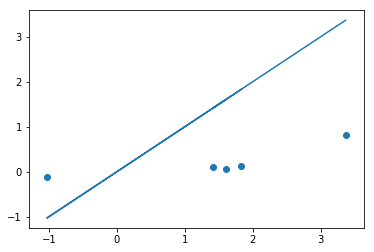

In [133]:
# to find the minimum variance weights simply replace  the vector of expected returns by a vector of constant.

# in this case I am usign the average, but the value does not matter for the weights, why?

er= (ERe.values*0+ERe.mean())
Wminv =np.linalg.inv(Cove) @ er
Wmve['minv']=Wminv/Wminv.sum()

# why these weights look like this ? Why are they shorting some assets?

plt.plot(Wmve['wghts0'],Wmve['wghts0'])
plt.scatter(x=Wmve['wghts0'],y=Wmve['minv'])


In [134]:
# what is the vol of the minimum-variance portfolio

(Wmve['minv'].T @ Cove @ Wmve['minv'])**0.5

0.01874310709388898

In [135]:
# What is the expected return of the minimum variance portfolio?

# using the average across assets
print(er @ Wmve['minv'])

#using each asset average return

ERe.values @ Wmve['minv']

0.004157534936321483


0.0025319375906308066

In [136]:
# Sharpe ratio

# using the average across assets
print((er @ Wmve['minv'])/(Wmve['minv'].T @ Cove @ Wmve['minv'])**0.5)

#using each asset average return

(ERe.values @ Wmve['minv'])/(Wmve['minv'].T @ Cove @ Wmve['minv'])**0.5

0.22181674124227835


0.13508633216188165

Which one is right? The one with the average acorss assets or the ones using each asset average return?

# Risk- Parity investing

assumes all assets have the same expected return and that all asset are uncorrelated.

It assumes that the non-diagonal terms in the covariacne matrix are all zeros.

Why this might make sense?

In [138]:
Covrp=Cove.copy()
Covrp=np.diag(np.diag(Covrp))
Covrp

array([[0.00194798, 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.00122677, 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.00355631, 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.00218166, 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.00040601]])

In [139]:

Wrp =np.linalg.inv(Covrp) @ er
Wmve['rp']=Wrp/Wrp.sum()
Wmve

,wghts0,Wgths1,wghtsdom,MKTUS-1std,MKTUS-1.96std,minv,rp
MKTUS,1.834995,0.684776,2.534954,-113.573489,-243.743181,0.136033,0.113297
BondUS,1.423872,0.531355,1.827591,42.002484,65.921867,0.104734,0.179902
EM,1.605498,0.599134,NaN,39.670494,59.258829,0.051921,0.062058
MKTxUS,-1.026051,-0.382898,NaN,58.540921,126.560312,-0.115740,0.101161
BondxUS,3.368940,1.257208,NaN,0.643562,-37.548808,0.823052,0.543582


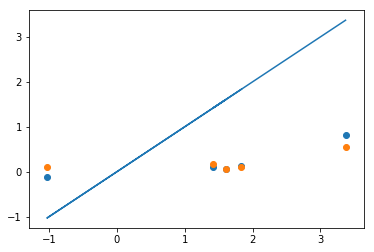

In [140]:
plt.plot(Wmve['wghts0'],Wmve['wghts0'])
plt.scatter(x=Wmve['wghts0'],y=Wmve['minv'])
plt.scatter(x=Wmve['wghts0'],y=Wmve['rp'])

In [141]:
# what is the vol of the risk portfolio, suing the diagonal assumption

print((Wmve['rp'].T @ Covrp @ Wmve['rp'])**0.5)


# using teh actual covariance matrix

(Wmve['rp'].T @ Cove @ Wmve['rp'])**0.5

0.014855944163260401


0.020636824890060454

In [142]:
# What is the expected return of the minimum variance portfolio?

# using the average across assets
print(er @ Wmve['rp'])

#using each asset average return

ERe.values @ Wmve['rp']

0.004157534936321483


0.0030012170375562216

In [144]:
# Sharpe ratio

# using the average across assets, adn diagnonal assumption
print((er @ Wmve['rp'])/(Wmve['rp'].T @ Covrp @ Wmve['rp'])**0.5)

#using each asset average return, actual covariacne matrix estimated from the data

(ERe.values @ Wmve['rp'])/(Wmve['rp'].T @ Cove @ Wmve['rp'])**0.5

0.279856661456988


0.1454301741447509

1. Which one is right? The one that uses the assumptions or the ones that we actually find in the data?

# Strategy evaluation

## Out of sample testing

- The entire point behind Minimum variance invest is that sample average are a not a good predictor of future returns
- So it cannot make sense to just use the average
- But you can't jsut use the assumption that you made up, because how do we know that we would get this?
- Risk-parity is exactly the same thing, but in addition to assuming expected returns are constant , it also assumes correlations are zero.
- The idea is the same: the variance minimization will use an in sample correlation to try to hedge the risk of one asset by shorting a related asset. If this previous correlation is not a good proxy for future correlation, using these correlations for hedging will just introduce noise.
- But of course, these correlations might be there, so if you ignore them, you might be leaving some diversification opportunities on the table


1. So the correct way of doing this is to do an out of sample test. 
2. You construct your weights only using data up to date t, and then forming portolios at date t, and looking how it performs from t to some future date

In [145]:
# here I estimate using a cumulative windown (which uses all data up to the trading date)
StrategyRe=Re.iloc[12*10+1:,0:3]


# Note that that we are using the orignal data frame to initiate a new dataframe that we will use to store the returns 
#from our 3 strategies
# this is a trick that I use often.
# in the first row I am selecting only the first 3 columns and all the dates, except the first 120 months
# This provides a minimum estimation windown of 10 years

StrategyRe.columns=['mve','minv','rp']
# here I am just changing the name of the columns to match the name of of our strategies

for t in StrategyRe.index:
# Here we are looping through the dates (which are the index of the data set)
# notice that the dates of Dataframe Ret starts 10 years after the start of our data set
# this means that our estimator of covariance and means below will start with a 10 year sample and increase over time
    Cov=Re[:t].cov()
    Er=Re[:t].mean()
    Wmve=np.linalg.inv(Cov) @ Er.values
    Wmve=Wmve/Wmve.sum()
    Wminv=np.linalg.inv(Cov) @ (Er.values*0+Er.mean())
    Wminv=Wminv/Wminv.sum()
    Covrp=np.diag(np.diag(Cov))
    Wrp=np.linalg.inv(Covrp) @ (Er.values*0+Er.mean())
    Wrp=Wrp/Wrp.sum()
    StrategyRe.loc[t,'mve']=Re.loc[t,] @ Wmve
    StrategyRe.loc[t,'minv']=Re.loc[t,] @ Wminv
    StrategyRe.loc[t,'rp']=Re.loc[t,] @ Wrp

    

In [146]:
StrategyRe.mean()*12

mve     1.123709
minv    0.034061
rp      0.042302
dtype: float64

In [147]:
StrategyRe.std()*12**0.5

mve     5.241794
minv    0.070701
rp      0.079738
dtype: float64

In [148]:
StrategyRe.mean()*12/(StrategyRe.std()*12**0.5)

mve     0.214375
minv    0.481759
rp      0.530512
dtype: float64

In [155]:
# we can also do with a rolling scheme, using always the last 10 years of data
from pandas.tseries.offsets import *
nyears=5
StrategyRe=Data.iloc[12*nyears+1:,0:3]
StrategyRe.columns=['mve','minv','rp']
for t in StrategyRe.index:
    # the 5 year lagging needs to be done
    Cov=Re[t-DateOffset(years=nyears,months=0):t].cov()
    Er=Re[t-DateOffset(years=nyears,months=0):t].mean()
    Wmve=np.linalg.inv(Cov) @ Er.values
    Wmve=Wmve/Wmve.sum()
    Wminv=np.linalg.inv(Cov) @ (Er.values*0+Er.mean())
    Wminv=Wminv/Wminv.sum()
    Covrp=np.diag(np.diag(Cov))
    Wrp=np.linalg.inv(Covrp) @ (Er.values*0+Er.mean())
    Wrp=Wrp/Wrp.sum()
    StrategyRe.loc[t,'mve']=Re.loc[t,] @ Wmve
    StrategyRe.loc[t,'minv']=Re.loc[t,] @ Wminv
    StrategyRe.loc[t,'rp']=Re.loc[t,] @ Wrp

    
# note the new trick we used here, the command DateOffset(years=3,months=3) allow us to 
# offset a date for a specific period, in this case below
# tnew=t-DateOffset(years=3,months=3)
# we have that tnew is 3 years and 3 months before date t.
# this offset allow one to very flexibly change the estimation windown.


In [156]:
StrategyRe.mean()*12/(StrategyRe.std()*12**0.5)

mve     0.199772
minv    0.532727
rp      0.545332
dtype: float64